<a href="https://colab.research.google.com/github/Darkunquie/my-projects/blob/main/CNN%20Major%20Execution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U transformers torch torchvision opencv-python-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
import cv2
import numpy as np
from transformers import pipeline, AutoImageProcessor, AutoModelForObjectDetection
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Use a pipeline as a high-level helper
pipe = pipeline("object-detection", model="facebook/detr-resnet-50")

# Load model directly
processor = AutoImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = AutoModelForObjectDetection.from_pretrained("facebook/detr-resnet-50")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
def process_detection_results(frame, detections, threshold=0.7):
    """
    Process and annotate detection results on the frame
    """
    for detection in detections:
        score = detection['score']
        if score < threshold:
            continue

        label = detection['label']
        box = detection['box']

        # Convert box to integer coordinates
        box = [int(b) for b in box]

        # Draw rectangle
        cv2.rectangle(
            frame,
            (box[0], box[1]),
            (box[2], box[3]),
            (0, 255, 0),
            2
        )

        # Add label and confidence
        label_text = f"{label}: {score:.2f}"
        cv2.putText(
            frame,
            label_text,
            (box[0], box[1] - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 255, 0),
            2
        )

    return frame

In [ ]:
import torch
import cv2
import numpy as np
from transformers import pipeline
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Use a pipeline as a high-level helper
pipe = pipeline("object-detection", model="facebook/detr-resnet-50")

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [ ]:
def process_detection_results(frame, detections, threshold=0.7):
    """
    Process and annotate detection results on the frame
    """
    for detection in detections:
        score = detection['score']
        if score < threshold:
            continue

        label = detection['label']
        box = detection['box']

        # Convert box to integer coordinates
        x, y, width, height = box.values()
        x, y, width, height = int(x), int(y), int(width), int(height)

        # Draw rectangle
        cv2.rectangle(
            frame,
            (x, y),
            (x + width, y + height),
            (0, 255, 0),
            2
        )

        # Add label and confidence
        label_text = f"{label}: {score:.2f}"
        cv2.putText(
            frame,
            label_text,
            (x, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 255, 0),
            2
        )

    return frame

In [ ]:
import torch
import cv2
import numpy as np
from transformers import pipeline
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Use a pipeline as a high-level helper
pipe = pipeline("object-detection", model="facebook/detr-resnet-50")

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [ ]:
def process_detection_results(frame, detections, threshold=0.7):
    """
    Process and annotate detection results on the frame
    """
    for detection in detections:
        score = detection['score']
        if score < threshold:
            continue

        label = detection['label']
        box = detection['box']

        # Convert box to integer coordinates
        x, y, width, height = box.values()
        x, y, width, height = int(x), int(y), int(width), int(height)

        # Draw rectangle
        cv2.rectangle(
            frame,
            (x, y),
            (x + width, y + height),
            (0, 255, 0),
            2
        )

        # Add label and confidence
        label_text = f"{label}: {score:.2f}"
        cv2.putText(
            frame,
            label_text,
            (x, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 255, 0),
            2
        )

    return frame

In [ ]:
!pip install -U transformers torch torchvision opencv-python-headless

In [ ]:
import torch
import cv2
import numpy as np
from transformers import pipeline
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Use a pipeline as a high-level helper
pipe = pipeline("object-detection", model="facebook/detr-resnet-50")

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [ ]:
def process_detection_results(frame, detections, threshold=0.7):
    """
    Process and annotate detection results on the frame
    """
    for detection in detections:
        score = detection['score']
        if score < threshold:
            continue

        label = detection['label']
        box = detection['box']

        # Convert box to integer coordinates
        x, y, width, height = box.values()
        x, y, width, height = int(x), int(y), int(width), int(height)

        # Draw rectangle
        cv2.rectangle(
            frame,
            (x, y),
            (x + width, y + height),
            (0, 255, 0),
            2
        )

        # Add label and confidence
        label_text = f"{label}: {score:.2f}"
        cv2.putText(
            frame,
            label_text,
            (x, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 255, 0),
            2
        )

    return frame

In [ ]:
import torch
import cv2
import numpy as np
from PIL import Image
from transformers import pipeline
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Use a pipeline as a high-level helper
pipe = pipeline("object-detection", model="facebook/detr-resnet-50")

model.safetensors:  51%|#####1    | 52.4M/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


In [ ]:
def process_detection_results(frame, detections, threshold=0.7):
    """
    Process and annotate detection results on the frame
    """
    for detection in detections:
        score = detection['score']
        if score < threshold:
            continue

        label = detection['label']
        box = detection['box']

        # Convert box to integer coordinates
        x, y, width, height = box.values()
        x, y, width, height = int(x), int(y), int(width), int(height)

        # Draw rectangle
        cv2.rectangle(
            frame,
            (x, y),
            (x + width, y + height),
            (0, 255, 0),
            2
        )

        # Add label and confidence
        label_text = f"{label}: {score:.2f}"
        cv2.putText(
            frame,
            label_text,
            (x, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 255, 0),
            2
        )

    return frame

<IPython.core.display.Javascript object>

Failed to capture frame data
Skipping frame due to capture failure
Failed to capture frame data
Skipping frame due to capture failure
Failed to capture frame data
Skipping frame due to capture failure


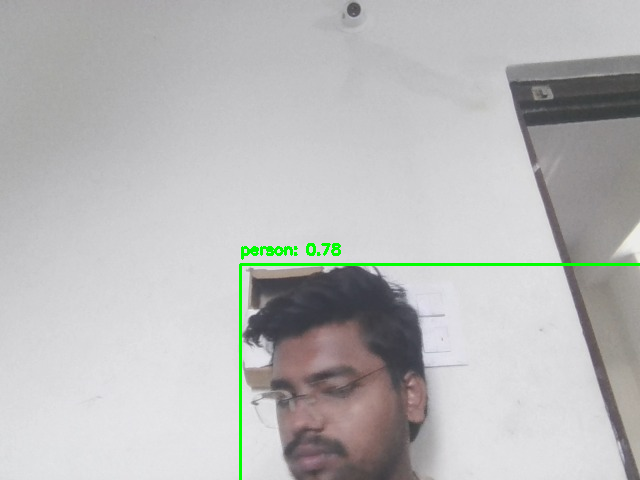

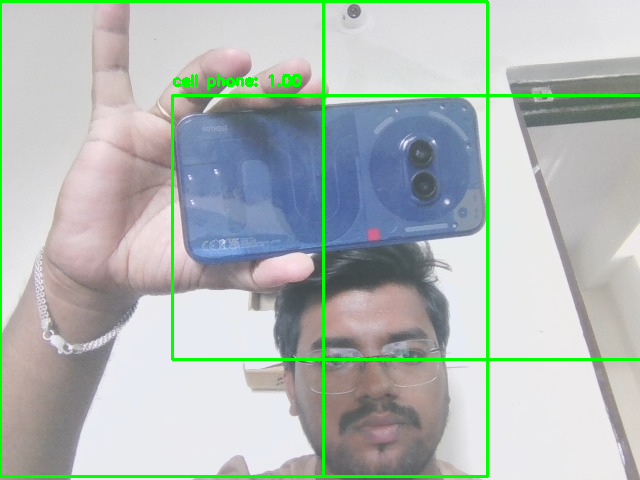

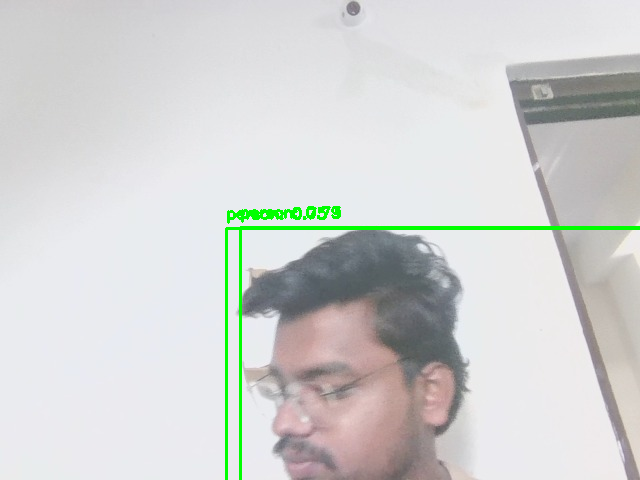

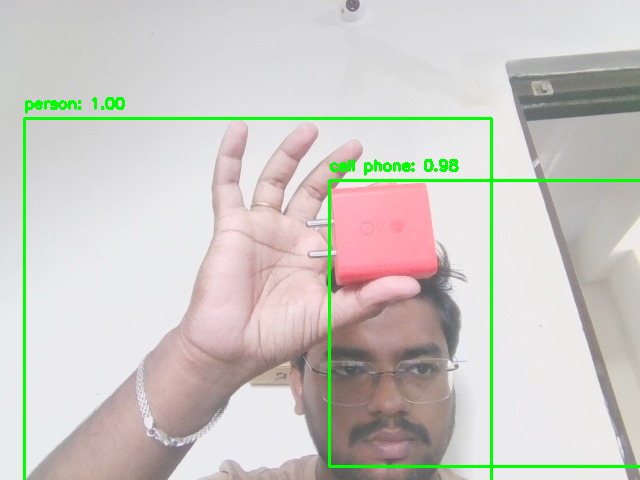

Detection stopped


In [ ]:
def colab_camera_detection():
    """
    Camera detection specifically for Google Colab
    """
    js = Javascript('''
    var video;
    var div = null;
    var canvas = null;
    function startCamera() {
        div = document.createElement('div');
        video = document.createElement('video');
        video.setAttribute('playsinline', '');
        video.setAttribute('autoplay', '');
        video.setAttribute('width', '640');
        video.setAttribute('height', '480');
        div.appendChild(video);

        canvas = document.createElement('canvas');
        canvas.setAttribute('width', '640');
        canvas.setAttribute('height', '480');
        div.appendChild(canvas);

        document.body.appendChild(div);

        return navigator.mediaDevices.getUserMedia({
            video: {
                width: { ideal: 640 },
                height: { ideal: 480 }
            }
        }).then(function(stream) {
            video.srcObject = stream;
            video.play();
            return new Promise(resolve => video.onplayed = resolve);
        });
    }

    async function captureFrame() {
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        return canvas.toDataURL('image/jpeg');
    }

    startCamera();
    ''')
    display(js)

    def get_frame():
        frame_data = eval_js('captureFrame()')
        if not frame_data or frame_data == 'data:,':
            print("Failed to capture frame data")
            return None
        data = b64decode(frame_data.split(',')[1])
        if len(data) == 0:
            print("Decoded data is empty")
            return None
        frame = np.frombuffer(data, dtype=np.uint8)
        frame = cv2.imdecode(frame, cv2.IMREAD_COLOR)
        return frame

    try:
        while True:
            frame = get_frame()
            if frame is None:
                print("Skipping frame due to capture failure")
                continue

            # Convert frame to PIL Image
            pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

            # Perform object detection
            detections = pipe(pil_image)

            # Annotate frame
            annotated_frame = process_detection_results(
                frame, detections
            )

            # Display in Colab
            cv2_imshow(annotated_frame)

    except KeyboardInterrupt:
        print("Detection stopped")

# Run the detection
colab_camera_detection()

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
Some weights of the model checkpoint at facebook/detr-resnet-5

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
Some weights of the model checkpoint at facebook/detr-resnet-5

<IPython.core.display.Javascript object>

Failed to capture frame data
Skipping frame due to capture failure


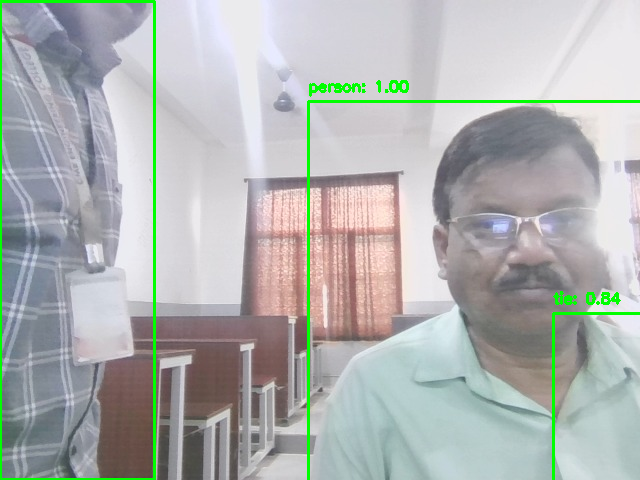

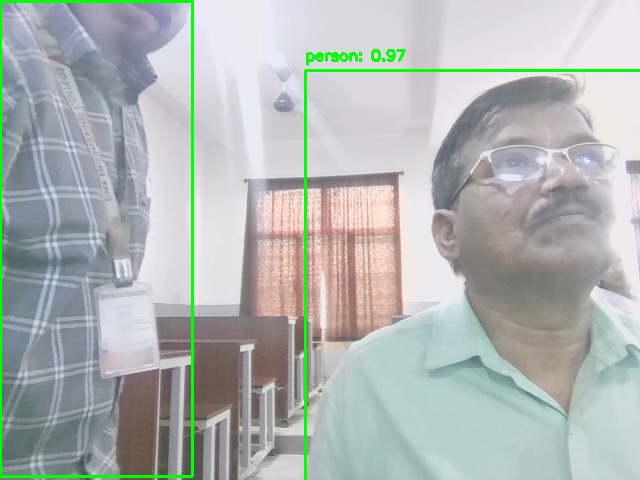

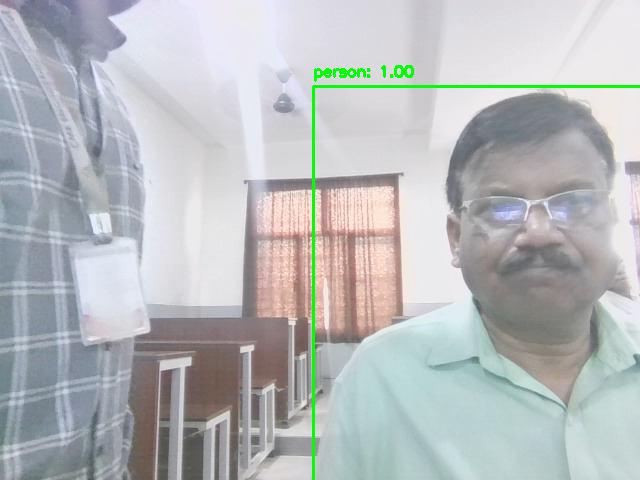

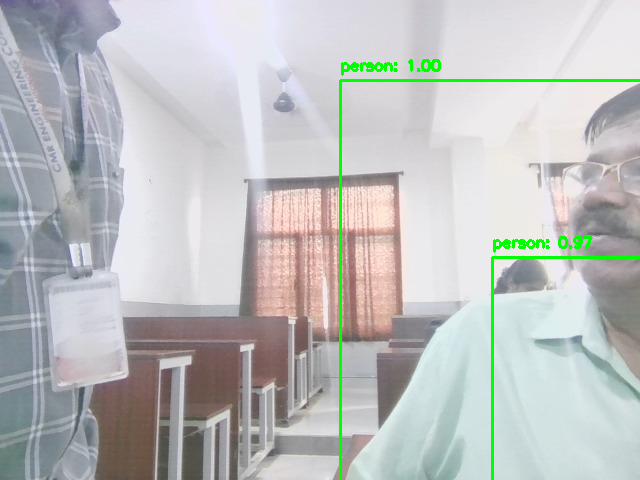

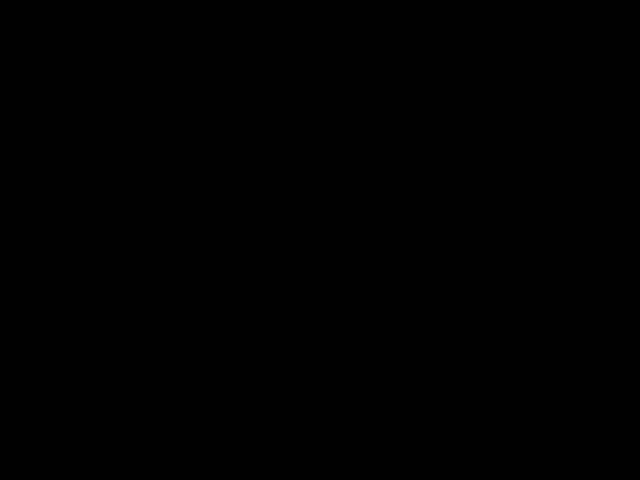

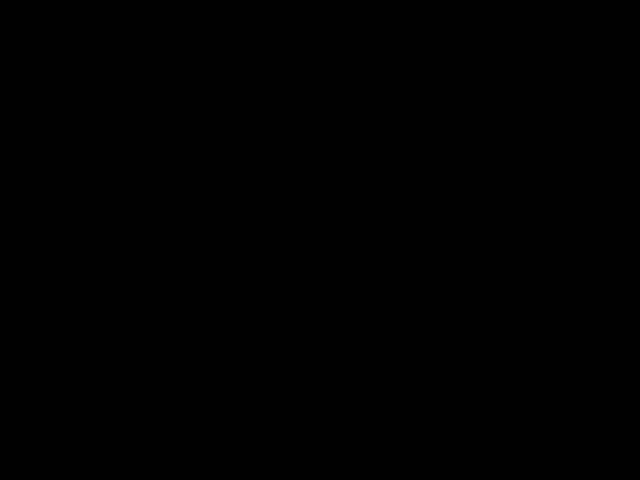

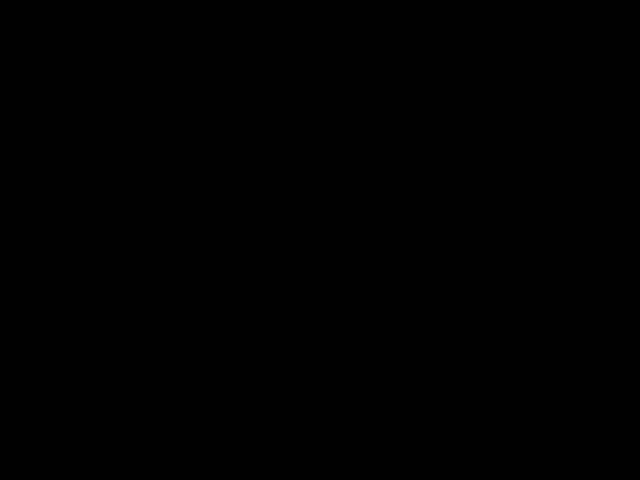

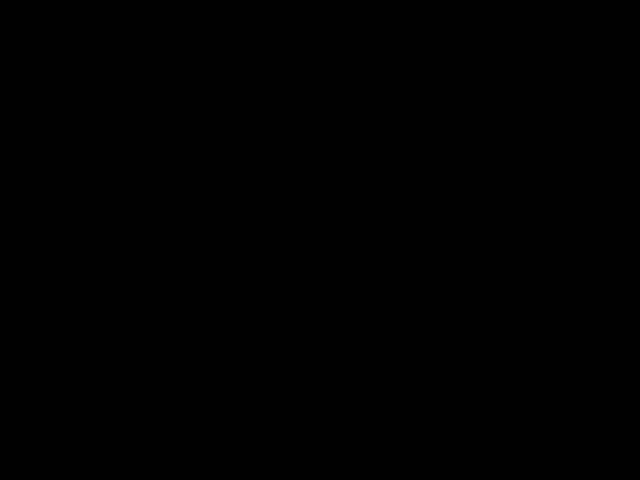

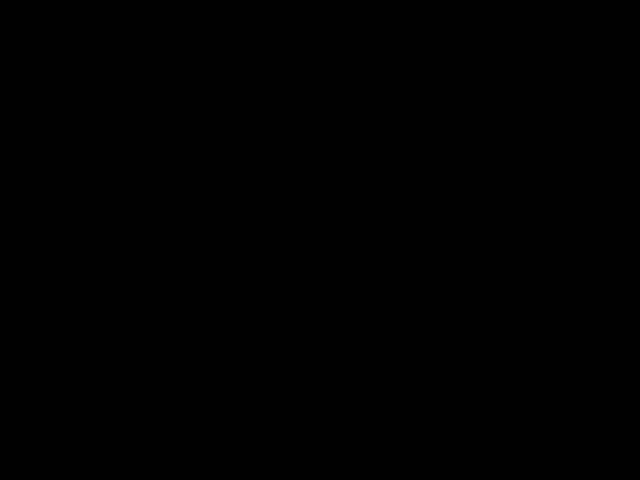

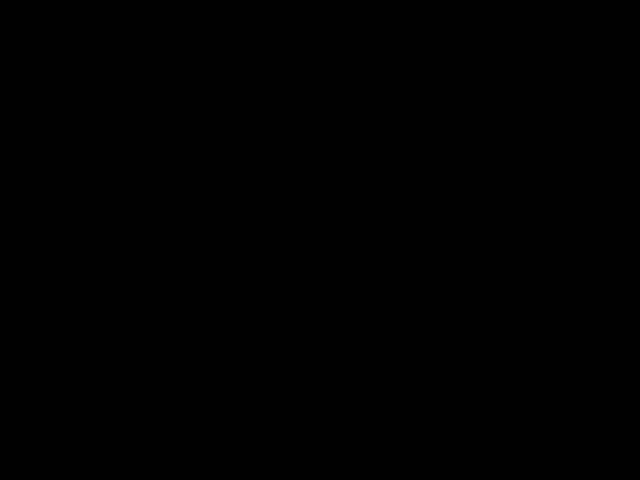

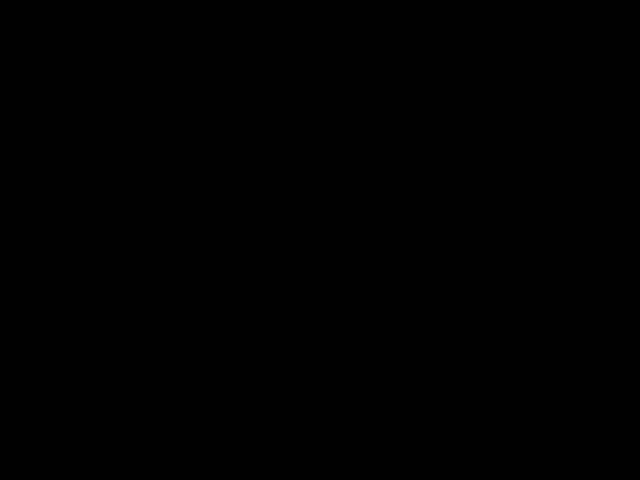

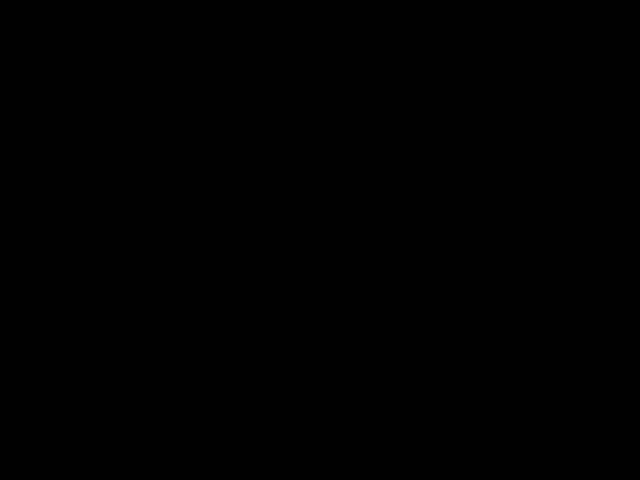

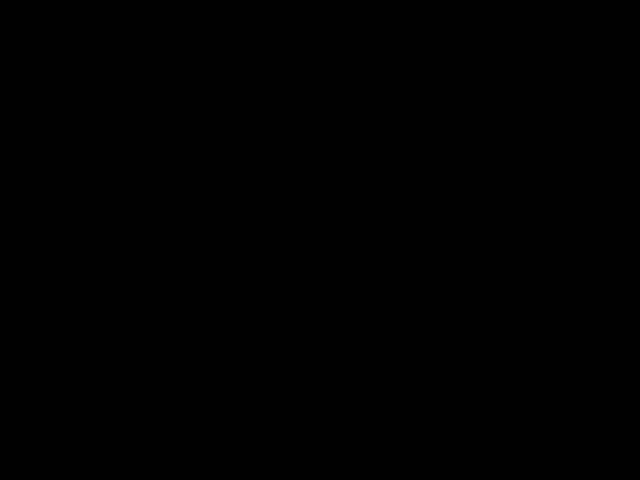

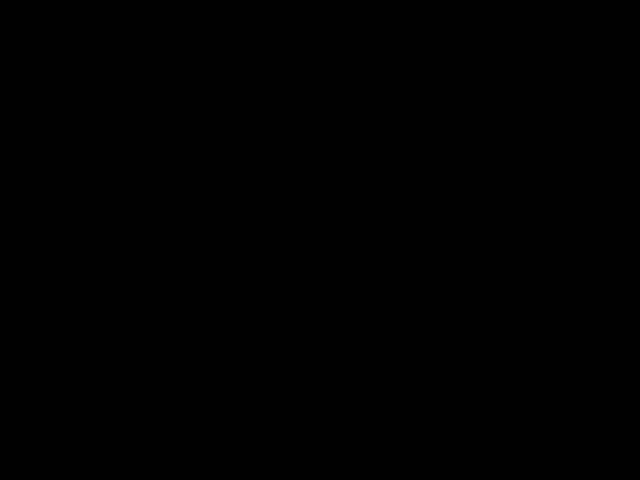

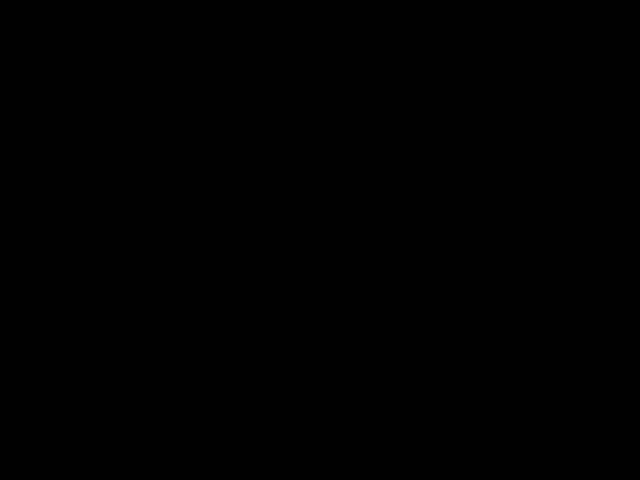

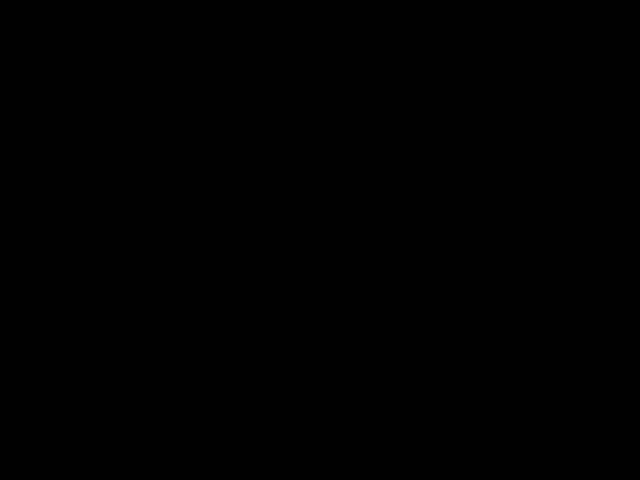

In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
!pip install -U transformers torch torchvision opencv-python-headless
# %%
import torch
import cv2
import numpy as np
from transformers import pipeline, AutoImageProcessor, AutoModelForObjectDetection
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Use a pipeline as a high-level helper
pipe = pipeline("object-detection", model="facebook/detr-resnet-50")

# Load model directly
processor = AutoImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = AutoModelForObjectDetection.from_pretrained("facebook/detr-resnet-50")
# %%
def process_detection_results(frame, detections, threshold=0.7):
    """
    Process and annotate detection results on the frame
    """
    for detection in detections:
        score = detection['score']
        if score < threshold:
            continue

        label = detection['label']
        box = detection['box']

        # Convert box to integer coordinates
        box = [int(b) for b in box]

        # Draw rectangle
        cv2.rectangle(
            frame,
            (box[0], box[1]),
            (box[2], box[3]),
            (0, 255, 0),
            2
        )

        # Add label and confidence
        label_text = f"{label}: {score:.2f}"
        cv2.putText(
            frame,
            label_text,
            (box[0], box[1] - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 255, 0),
            2
        )

    return frame
# %%
import torch
import cv2
import numpy as np
from transformers import pipeline
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Use a pipeline as a high-level helper
pipe = pipeline("object-detection", model="facebook/detr-resnet-50")
# %%
def process_detection_results(frame, detections, threshold=0.7):
    """
    Process and annotate detection results on the frame
    """
    for detection in detections:
        score = detection['score']
        if score < threshold:
            continue

        label = detection['label']
        box = detection['box']

        # Convert box to integer coordinates
        x, y, width, height = box.values()
        x, y, width, height = int(x), int(y), int(width), int(height)

        # Draw rectangle
        cv2.rectangle(
            frame,
            (x, y),
            (x + width, y + height),
            (0, 255, 0),
            2
        )

        # Add label and confidence
        label_text = f"{label}: {score:.2f}"
        cv2.putText(
            frame,
            label_text,
            (x, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 255, 0),
            2
        )

    return frame
# %%
import torch
import cv2
import numpy as np
from transformers import pipeline
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Use a pipeline as a high-level helper
pipe = pipeline("object-detection", model="facebook/detr-resnet-50")
# %%
def process_detection_results(frame, detections, threshold=0.7):
    """
    Process and annotate detection results on the frame
    """
    for detection in detections:
        score = detection['score']
        if score < threshold:
            continue

        label = detection['label']
        box = detection['box']

        # Convert box to integer coordinates
        x, y, width, height = box.values()
        x, y, width, height = int(x), int(y), int(width), int(height)

        # Draw rectangle
        cv2.rectangle(
            frame,
            (x, y),
            (x + width, y + height),
            (0, 255, 0),
            2
        )

        # Add label and confidence
        label_text = f"{label}: {score:.2f}"
        cv2.putText(
            frame,
            label_text,
            (x, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 255, 0),
            2
        )

    return frame
# %%
!pip install -U transformers torch torchvision opencv-python-headless
# %%
import torch
import cv2
import numpy as np
from transformers import pipeline
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Use a pipeline as a high-level helper
pipe = pipeline("object-detection", model="facebook/detr-resnet-50")
# %%
def process_detection_results(frame, detections, threshold=0.7):
    """
    Process and annotate detection results on the frame
    """
    for detection in detections:
        score = detection['score']
        if score < threshold:
            continue

        label = detection['label']
        box = detection['box']

        # Convert box to integer coordinates
        x, y, width, height = box.values()
        x, y, width, height = int(x), int(y), int(width), int(height)

        # Draw rectangle
        cv2.rectangle(
            frame,
            (x, y),
            (x + width, y + height),
            (0, 255, 0),
            2
        )

        # Add label and confidence
        label_text = f"{label}: {score:.2f}"
        cv2.putText(
            frame,
            label_text,
            (x, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 255, 0),
            2
        )

    return frame
# %%
import torch
import cv2
import numpy as np
from PIL import Image
from transformers import pipeline
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Use a pipeline as a high-level helper
pipe = pipeline("object-detection", model="facebook/detr-resnet-50")
# %%
def process_detection_results(frame, detections, threshold=0.7):
    """
    Process and annotate detection results on the frame
    """
    for detection in detections:
        score = detection['score']
        if score < threshold:
            continue

        label = detection['label']
        box = detection['box']

        # Convert box to integer coordinates
        x, y, width, height = box.values()
        x, y, width, height = int(x), int(y), int(width), int(height)

        # Draw rectangle
        cv2.rectangle(
            frame,
            (x, y),
            (x + width, y + height),
            (0, 255, 0),
            2
        )

        # Add label and confidence
        label_text = f"{label}: {score:.2f}"
        cv2.putText(
            frame,
            label_text,
            (x, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 255, 0),
            2
        )

    return frame
# %%
# Global variable to control the camera
camera_on = True

def colab_camera_detection():
    """
    Camera detection specifically for Google Colab
    """
    global camera_on  # Access the global variable
    js = Javascript('''
    var video;
    var div = null;
    var canvas = null;
    function startCamera() {
        div = document.createElement('div');
        video = document.createElement('video');
        video.setAttribute('playsinline', '');
        video.setAttribute('autoplay', '');
        video.setAttribute('width', '640');
        video.setAttribute('height', '480');
        div.appendChild(video);

        canvas = document.createElement('canvas');
        canvas.setAttribute('width', '640');
        canvas.setAttribute('height', '480');
        div.appendChild(canvas);

        document.body.appendChild(div);

        return navigator.mediaDevices.getUserMedia({
            video: {
                width: { ideal: 640 },
                height: { ideal: 480 }
            }
        }).then(function(stream) {
            video.srcObject = stream;
            video.play();
            return new Promise(resolve => video.onplayed = resolve);
        });
    }

    async function captureFrame() {
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        return canvas.toDataURL('image/jpeg');
    }

    function stopCamera() {
        let stream = video.srcObject;
        let tracks = stream.getTracks();

        tracks.forEach(function(track) {
            track.stop();
        });

        video.srcObject = null;
    }

    startCamera();
    ''')
    display(js)

    def get_frame():
        frame_data = eval_js('captureFrame()')
        if not frame_data or frame_data == 'data:,':
            print("Failed to capture frame data")
            return None
        data = b64decode(frame_data.split(',')[1])
        if len(data) == 0:
            print("Decoded data is empty")
            return None
        frame = np.frombuffer(data, dtype=np.uint8)
        frame = cv2.imdecode(frame, cv2.IMREAD_COLOR)
        return frame

    try:
        while camera_on:  # Check the camera_on flag
            frame = get_frame()
            if frame is None:
                print("Skipping frame due to capture failure")
                continue

            # Convert frame to PIL Image
            pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

            # Perform object detection
            detections = pipe(pil_image)

            # Annotate frame
            annotated_frame = process_detection_results(
                frame, detections
            )

            # Display in Colab
            cv2_imshow(annotated_frame)

    except KeyboardInterrupt:
        print("Detection stopped")
    finally:
        # Turn off the camera when the loop ends
        camera_on = False
        eval_js('stopCamera()')

# Run the detection
colab_camera_detection()
# %%

In [ ]:
camera_on = True

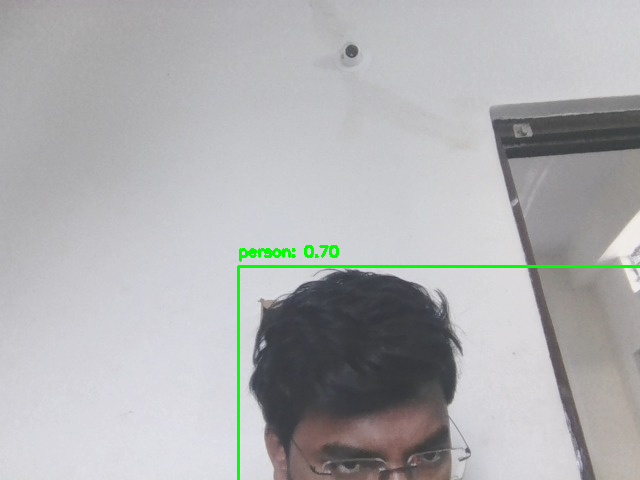

MessageError: ReferenceError: stopCamera is not defined

In [ ]:
import torch
import cv2
import numpy as np
from PIL import Image
from transformers import pipeline
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript, clear_output
from google.colab.output import eval_js
from base64 import b64decode

# Use a pipeline as a high-level helper
pipe = pipeline("object-detection", model="facebook/detr-resnet-50")

def process_detection_results(frame, detections, threshold=0.7):
    """
    Process and annotate detection results on the frame
    """
    for detection in detections:
        score = detection['score']
        if score < threshold:
            continue

        label = detection['label']
        box = detection['box']

        # Convert box to integer coordinates
        x, y, width, height = box.values()
        x, y, width, height = int(x), int(y), int(width), int(height)

        # Draw rectangle
        cv2.rectangle(
            frame,
            (x, y),
            (x + width, y + height),
            (0, 255, 0),
            2
        )

        # Add label and confidence
        label_text = f"{label}: {score:.2f}"
        cv2.putText(
            frame,
            label_text,
            (x, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 255, 0),
            2
        )

    return frame

# Global variable to control the camera
camera_on = True

def colab_camera_detection():
    """
    Camera detection specifically for Google Colab
    """
    global camera_on  # Access the global variable

    # Define JavaScript code in a string
    js_code = '''
    var video;
    var div = null;
    var canvas = null;

    async function captureFrame() {
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        return canvas.toDataURL('image/jpeg');
    }

    function stopCamera() {
        let stream = video.srcObject;
        let tracks = stream.getTracks();

        tracks.forEach(function(track) {
            track.stop();
        });

        video.srcObject = null;
        // Remove the video element to avoid memory leaks
        if (div && div.parentNode) {
            div.parentNode.removeChild(div);
        }
    }

    function startCamera() {
        div = document.createElement('div');
        video = document.createElement('video');
        video.setAttribute('playsinline', '');
        video.setAttribute('autoplay', '');
        video.setAttribute('width', '640');
        video.setAttribute('height', '480');
        div.appendChild(video);

        canvas = document.createElement('canvas');
        canvas.setAttribute('width', '640');
        canvas.setAttribute('height', '480');
        div.appendChild(canvas);

        document.body.appendChild(div);

        return navigator.mediaDevices.getUserMedia({
            video: {
                width: { ideal: 640 },
                height: { ideal: 480 }
            }
        }).then(function(stream) {
            video.srcObject = stream;
            video.play();
            return new Promise(resolve => video.onplayed = resolve);
        });
    }

    startCamera();
    '''

    # Execute JavaScript code
    display(Javascript(js_code))

    def get_frame():
        frame_data = eval_js('captureFrame()')
        if not frame_data or frame_data == 'data:,':
            print("Failed to capture frame data")
            return None
        data = b64decode(frame_data.split(',')[1])
        if len(data) == 0:
            print("Decoded data is empty")
            return None
        frame = np.frombuffer(data, dtype=np.uint8)
        frame = cv2.imdecode(frame, cv2.IMREAD_COLOR)
        return frame

    try:
        while camera_on:  # Check the camera_on flag
            frame = get_frame()
            if frame is None:
                print("Skipping frame due to capture failure")
                continue

            # Convert frame to PIL Image
            pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

            # Perform object detection
            detections = pipe(pil_image)

            # Annotate frame
            annotated_frame = process_detection_results(
                frame, detections
            )

            # Display in Colab, clearing previous output
            clear_output(wait=True)  # Clear previous output
            cv2_imshow(annotated_frame)

    except KeyboardInterrupt:
        print("Detection stopped")
    finally:
        # Turn off the camera when the loop ends
        camera_on = False
        eval_js('stopCamera()')

# Run the detection
colab_camera_detection()

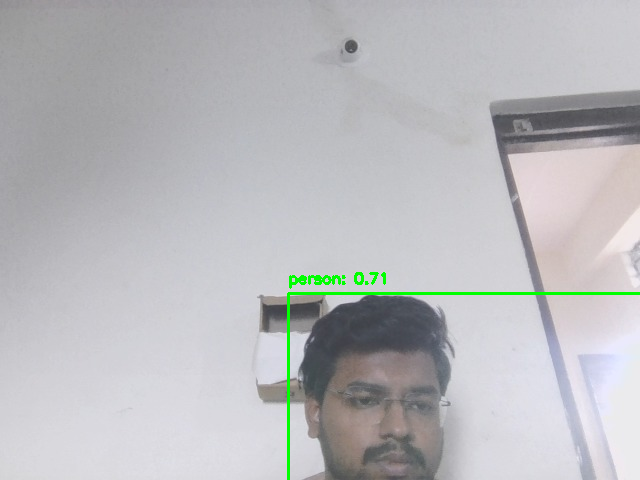

MessageError: ReferenceError: stopCamera is not defined

In [ ]:
import torch
import cv2
import numpy as np
from PIL import Image
from transformers import pipeline
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript, clear_output
from google.colab.output import eval_js
from base64 import b64decode

# Use a pipeline as a high-level helper
pipe = pipeline("object-detection", model="facebook/detr-resnet-50")

def process_detection_results(frame, detections, threshold=0.7):
    """
    Process and annotate detection results on the frame
    """
    for detection in detections:
        score = detection['score']
        if score < threshold:
            continue

        label = detection['label']
        box = detection['box']

        # Convert box to integer coordinates
        x, y, width, height = box.values()
        x, y, width, height = int(x), int(y), int(width), int(height)

        # Draw rectangle
        cv2.rectangle(
            frame,
            (x, y),
            (x + width, y + height),
            (0, 255, 0),
            2
        )

        # Add label and confidence
        label_text = f"{label}: {score:.2f}"
        cv2.putText(
            frame,
            label_text,
            (x, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 255, 0),
            2
        )

    return frame

# Global variable to control the camera
camera_on = True

def colab_camera_detection():
    """
    Camera detection specifically for Google Colab
    """
    global camera_on  # Access the global variable

    # Define JavaScript code in a string
    js_code = '''
    var video;
    var div = null;
    var canvas = null;

    async function captureFrame() {
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        return canvas.toDataURL('image/jpeg');
    }

    function stopCamera() {
        let stream = video.srcObject;
        let tracks = stream.getTracks();

        tracks.forEach(function(track) {
            track.stop();
        });

        video.srcObject = null;
        // Remove the video element to avoid memory leaks
        if (div && div.parentNode) {
            div.parentNode.removeChild(div);
        }
    }

    function startCamera() {
        div = document.createElement('div');
        video = document.createElement('video');
        video.setAttribute('playsinline', '');
        video.setAttribute('autoplay', '');
        video.setAttribute('width', '640');
        video.setAttribute('height', '480');
        div.appendChild(video);

        canvas = document.createElement('canvas');
        canvas.setAttribute('width', '640');
        canvas.setAttribute('height', '480');
        div.appendChild(canvas);

        document.body.appendChild(div);

        return navigator.mediaDevices.getUserMedia({
            video: {
                width: { ideal: 640 },
                height: { ideal: 480 }
            }
        }).then(function(stream) {
            video.srcObject = stream;
            video.play();
            return new Promise(resolve => video.onplayed = resolve);
        });
    }

    startCamera();
    '''

    # Execute JavaScript code
    display(Javascript(js_code))

    def get_frame():
        frame_data = eval_js('captureFrame()')
        if not frame_data or frame_data == 'data:,':
            print("Failed to capture frame data")
            return None
        data = b64decode(frame_data.split(',')[1])
        if len(data) == 0:
            print("Decoded data is empty")
            return None
        frame = np.frombuffer(data, dtype=np.uint8)
        frame = cv2.imdecode(frame, cv2.IMREAD_COLOR)
        return frame

    try:
        while camera_on:  # Check the camera_on flag
            frame = get_frame()
            if frame is None:
                print("Skipping frame due to capture failure")
                continue

            # Convert frame to PIL Image
            pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

            # Perform object detection
            detections = pipe(pil_image)

            # Annotate frame
            annotated_frame = process_detection_results(
                frame, detections
            )

            # Display in Colab, clearing previous output
            clear_output(wait=True)  # Clear previous output
            cv2_imshow(annotated_frame)

    except KeyboardInterrupt:
        print("Detection stopped")
    finally:
        # Turn off the camera when the loop ends
        camera_on = False
        eval_js('stopCamera()')

# Run the detection
colab_camera_detection()

In [ ]:
import torch
import cv2
import numpy as np
from PIL import Image
from transformers import pipeline
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript, clear_output
from google.colab.output import eval_js
from base64 import b64decode

# Use a pipeline as a high-level helper
pipe = pipeline("object-detection", model="facebook/detr-resnet-50")

def process_detection_results(frame, detections, threshold=0.7):
    """
    Process and annotate detection results on the frame.
    """
    for detection in detections:
        if detection['score'] >= threshold:
            label = detection['label']
            x, y, width, height = detection['box'].values()
            x, y, width, height = int(x), int(y), int(width), int(height)

            cv2.rectangle(frame, (x, y), (x + width, y + height), (0, 255, 0), 2)
            cv2.putText(frame, f"{label}: {detection['score']:.2f}", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return frame

def colab_camera_detection():
    """
    Camera detection specifically for Google Colab.
    """
    js_code = '''
    async function captureFrame() {
        const canvas = document.createElement('canvas');
        const video = document.createElement('video');
        video.setAttribute('playsinline', '');
        video.setAttribute('autoplay', '');
        video.setAttribute('width', '640');
        video.setAttribute('height', '480');
        document.body.appendChild(video);

        const stream = await navigator.mediaDevices.getUserMedia({
            video: { width: { ideal: 640 }, height: { ideal: 480 } }
        });
        video.srcObject = stream;
        await new Promise(resolve => video.onplayed = resolve);

        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        const frameData = canvas.toDataURL('image/jpeg');

        // Stop the camera and remove elements
        stream.getTracks().forEach(track => track.stop());
        video.srcObject = null;
        video.remove();
        canvas.remove();

        return frameData;
    }
    '''

    display(Javascript(js_code))

    while True:
        try:
            frame_data = eval_js('captureFrame()')
            if not frame_data or frame_data == 'data:,':
                print("Failed to capture frame data")
                continue
            data = b64decode(frame_data.split(',')[1])
            if len(data) == 0:
                print("Decoded data is empty")
                continue
            frame = np.frombuffer(data, dtype=np.uint8)
            frame = cv2.imdecode(frame, cv2.IMREAD_COLOR)

            pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            detections = pipe(pil_image)

            annotated_frame = process_detection_results(frame, detections)
            clear_output(wait=True)
            cv2_imshow(annotated_frame)

        except KeyboardInterrupt:
            print("Detection stopped")
            break

# Run the

colab_camera_detection()

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


<IPython.core.display.Javascript object>

Detection stopped
